[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/IPML/blob/master/tutorial_notebooks/t10_trees.ipynb)

# Classification and Regression Trees
The notebook revisits the lecture on classification and regression trees. First, we showcase how to use `sklearn` for training and applying tree-based learning algorithms using our standard data sets from earlier tutorials, HMEQ and California Housing. Next, we consider synthetic two-dimensional data and examine the decision boundary of decision trees in detail. 

Please note that the notebook is accompanied by a helper file called `t10_helper.py`. Please make sure this helper file is available in the folder from which you run this notebook.

## Preliminaries

### Standard imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading our two standard data sets for regression and classification 
All below codes are copied from earlier notebooks, which provide details. 

#### California Housing

In [9]:
# Retrieve data from sklearn library as Pandas dataframe
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)  
# Create default variables names X, y for further analysis
# We use the suffix _reg to highlight that this data facilitates regression
X_reg = california_housing.data
y_ref = california_housing.target

#### Home Equity Mortgage Data
The HMEQ data set facilitates classification. Given that this data set exhibits some missing values and categorical features, we need to perform a bit of data preparation before we can create our standard data structures `X, y` for further analysis

In [10]:
# Download the data from the web
url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/hmeq.csv'
df = pd.read_csv(url)  # standard pandas function to load tabular data in CSV format

# Missing value handling
for col in df.columns:  # loop through all the columns (i.e., features)
    if df[col].dtype == 'O':  # decide on the imputation strategy based on the data type
        df[col].fillna(df[col].mode()[0], inplace=True)  # mode replacement for categories
    else:
        df[col].fillna(df[col].median(), inplace=True)  # mean replacement for all other features 

# Dummy coding of the (two) categorical variables
df = pd.get_dummies(data=df, drop_first=True)

# Create default variables names X, y for further analysis
# We use the suffix _cls to highlight that this data facilitates regression
X_cls = df.copy()
y_cls = X_cls.pop('BAD')

#### Eyeballing the data

## Training Tree-Based Models using Sci-kit Learn

## Visualizing Decisions Trees in 2D

In [2]:
import t10_helper

In [3]:
X, y = t10_helper.generate2D_data()

(<Figure size 1800x500 with 2 Axes>,
 <Axes: title={'center': 'Data set'}, xlabel='$X_1$', ylabel='$X_2$'>,
 <Axes: title={'center': 'Classifier'}, xlabel='$X_1$', ylabel='$X_2$'>)

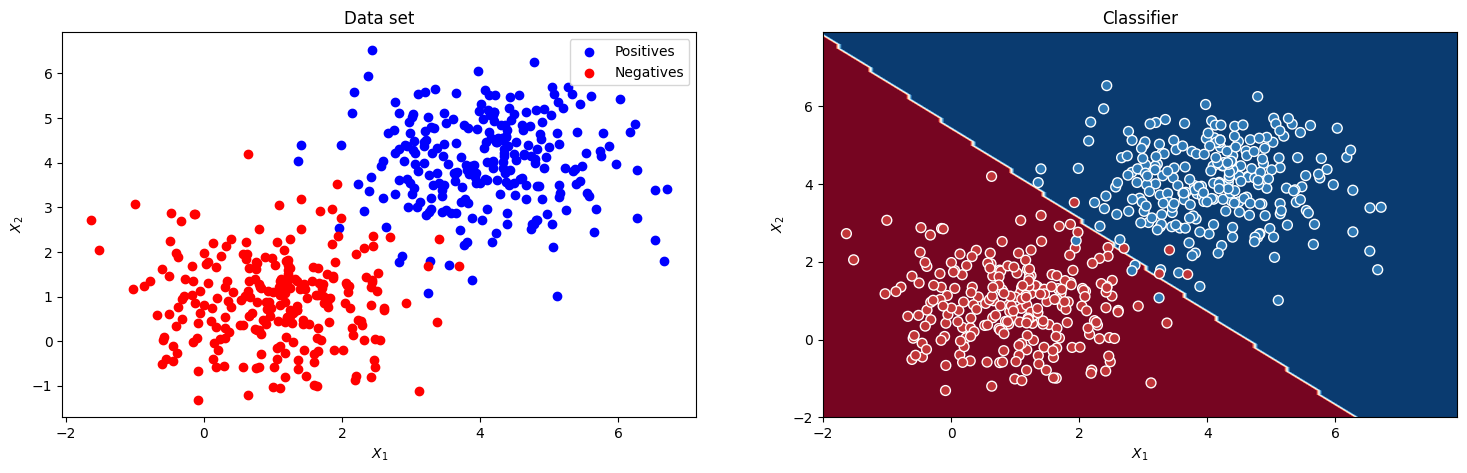

In [4]:
t10_helper.plot_classifier_solution(X,y, LogisticRegression())

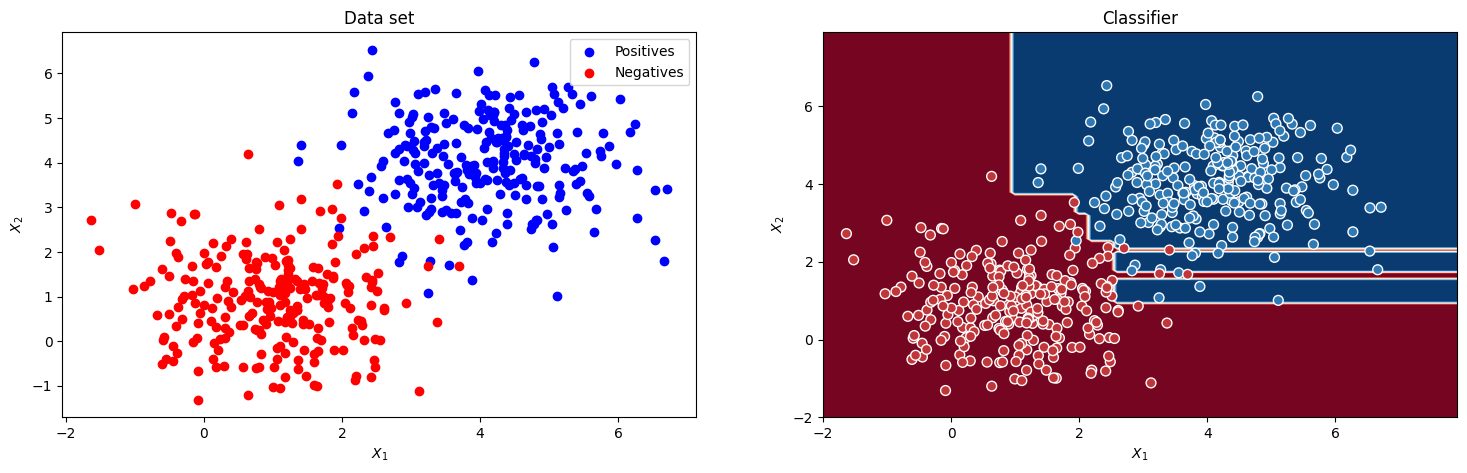

In [19]:
_ = t10_helper.plot_classifier_solution(X,y, DecisionTreeClassifier(max_depth=250))

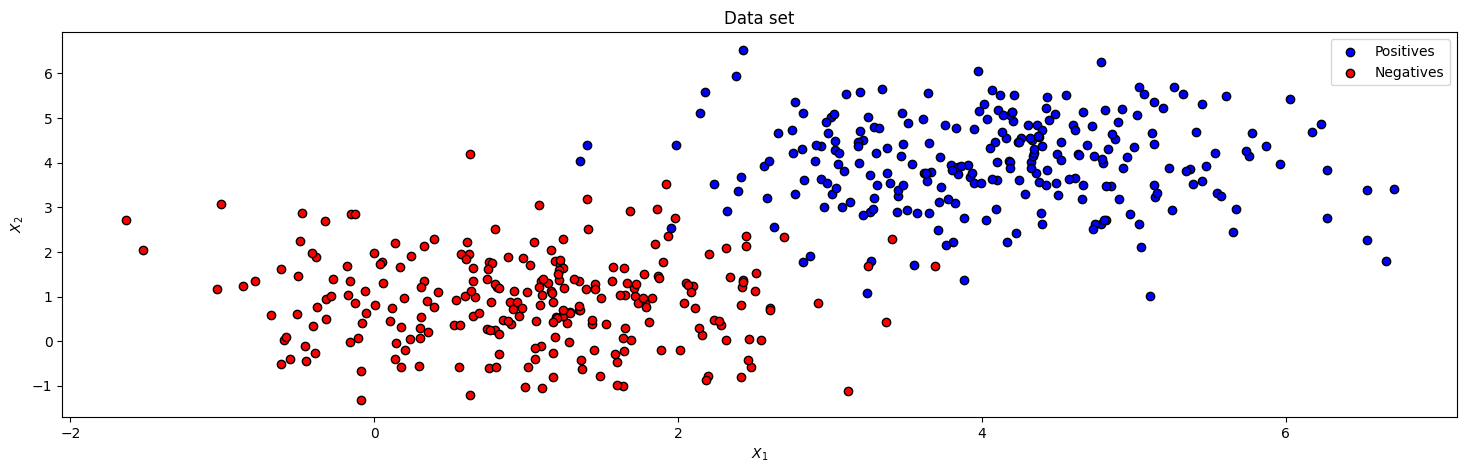

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 5))

ax1.set_title('Data set')

ix = y==1
contour_2 = ax1.scatter(X[ix,0], X[ix,1], c='blue',  label="Positives", edgecolor="k", linewidth=1)
contour_2 = ax1.scatter(X[~ix,0], X[~ix,1], c='red',  label="Negatives", edgecolor="k", linewidth=1)
ax1.set(xlabel="$X_1$", ylabel="$X_2$")
ax1.legend(loc='best')

In [12]:
np.where(y==1)

(array([  3,   7,  10,  11,  12,  14,  15,  19,  20,  21,  22,  23,  26,
         27,  33,  35,  38,  40,  41,  43,  44,  46,  47,  49,  50,  52,
         57,  59,  60,  61,  63,  68,  71,  77,  78,  79,  80,  81,  82,
         88,  89,  91,  92,  93,  96,  98,  99, 100, 101, 102, 103, 106,
        110, 112, 120, 121, 123, 124, 125, 131, 132, 136, 139, 140, 143,
        144, 145, 146, 147, 148, 151, 152, 154, 156, 158, 159, 160, 161,
        164, 166, 167, 168, 169, 170, 172, 174, 175, 176, 177, 182, 183,
        187, 188, 190, 193, 195, 196, 200, 201, 203, 205, 206, 207, 209,
        212, 213, 217, 220, 221, 222, 229, 231, 232, 233, 237, 241, 242,
        245, 246, 247, 249, 250, 251, 255, 256, 257, 258, 260, 262, 265,
        267, 268, 269, 270, 273, 274, 278, 280, 282, 284, 285, 286, 287,
        288, 291, 292, 296, 298, 300, 301, 303, 305, 308, 313, 315, 316,
        317, 318, 319, 320, 322, 323, 324, 326, 327, 329, 330, 333, 336,
        337, 341, 342, 343, 344, 345, 346, 347, 349